#### Random Forest to predict customers who are likely to churn

With random forest, we predicted the customers who are likely to churn with 86.03% accuracy

In [4]:
# Import the required libraries
import pandas as pd
import numpy as np
import patsy as pt
%pylab inline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from patsy import dmatrices
from subprocess import check_call


#Import the data :
df = pd.read_csv('Churn_Modelling.csv',error_bad_lines=False)

# One Hot Encoding
df1 = pd.get_dummies(df.iloc[:,3:14])

# Extract features and labels
labels=df1['Exited']

# Training and Testing Sets
df1 = df1.drop('Exited', axis = 1)
train, test, train_labels, test_labels = train_test_split(df1,labels, test_size = 0.3, random_state = 11)

#create test data set :
test_df=test.merge(test_labels, right_index=True,left_index=True)
#test_df[:10]


Populating the interactive namespace from numpy and matplotlib


C:\Users\AsuS\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# Build random forest model:

rf_exp = RandomForestClassifier(n_estimators= 1000,bootstrap = True, random_state=100)
rf_exp.fit(train, train_labels)

# Make predictions on test data
predictions = rf_exp.predict(test)
train_rf_probs = rf_exp.predict_proba(test)[:, 1]

In [6]:
## Confusion Matrix

cm = confusion_matrix(test_labels, predictions)

# Calculate the model accuracy
accuracy = (cm[0,0]+cm[1,1])*1.0/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print "The model accuracy is :", round((accuracy*100),2), " %"

print "Confustion Matrix: "
print cm


The model accuracy is : 86.03  %
Confustion Matrix: 
[[2287   88]
 [ 331  294]]


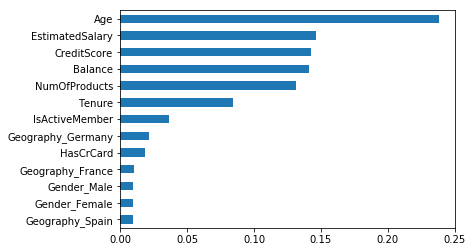

In [7]:
# Metrics importance:
importances = list(rf_exp.feature_importances_)
col_list = list(df1.columns)
feat_importances = pd.Series(rf_exp.feature_importances_, index=train.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')

In [9]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df1, round(importance, 2)) for df1, importance in zip(col_list, importances)]

feature_importances

[('CreditScore', 0.14),
 ('Age', 0.24),
 ('Tenure', 0.08),
 ('Balance', 0.14),
 ('NumOfProducts', 0.13),
 ('HasCrCard', 0.02),
 ('IsActiveMember', 0.04),
 ('EstimatedSalary', 0.15),
 ('Geography_France', 0.01),
 ('Geography_Germany', 0.02),
 ('Geography_Spain', 0.01),
 ('Gender_Female', 0.01),
 ('Gender_Male', 0.01)]

###### Important Variables :
Credit Score , Age , Estimated Salary Balance and Number of Bank Products used are important features while deciding the probability of a customer getting churned 